# Preprocessing

### A suite of preprocess toolkit

## Load Libraries

In [5]:
from util import *
from util.parser import *
from util.img_kit import *
from util.notebook_display import *
from IPython import display
import numpy as np
from scipy import ndimage
from scipy import misc
from os import walk
import os
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['figure.figsize'] = (5.0, 5.0) # set default size of plots
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [60]:
def plot_img(img):
    ax = plt.subplot(1,1,1)
    plt.imshow(img)
    disable_axis(ax)

In [22]:
def sample_img(imgs):
    return imgs[np.random.choice(range(len(imgs)))]

In [23]:
def sample_and_show(imgs):
    sample = sample_img(imgs)
    plot_img(sample)
    return sample

## Resize Images

In [6]:
# size = (256, 256)
size = (128, 128)
# img_folder = "data/moving-box/frames/ffmpeg"
img_folder = "data/moving-box/frames/moving-box-uniform/"
output = os.path.join(img_folder, "x".join([str(x) for x in size]))
resize_all(img_folder, output, size)
print("Images in {} resized to {}, \n         saved in {}".format(img_folder, str(size), output))

data/moving-box/frames/moving-box-uniform/128x128 not existing. Just created!
Images in data/moving-box/frames/moving-box-uniform/ resized to (128, 128), 
         saved in data/moving-box/frames/moving-box-uniform/128x128


## Convert Images to Gray Scale

original dim: (720, 960, 3)
grayed   dim: (720, 960)


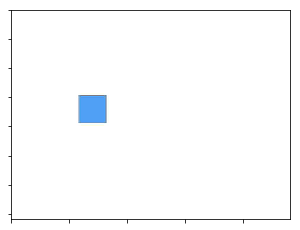

In [67]:
folder = "data/moving-box/frames/moving-box-non-uniform"
imgs = imgs_in_folder(folder, "jpg")
sample = sample_and_show(imgs)
grayed = rgb2gray(sample)
print("original dim: {}".format(sample.shape))
print("grayed   dim: {}".format(grayed.shape))

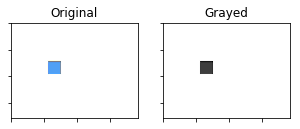

In [16]:
plt.axis('off')
ax = plt.subplot(1, 2, 1)
ax.set_aspect('equal')
disable_axis(ax)
plt.title("Original")
plt.imshow(sample)
ax = plt.subplot(1, 2, 2)
disable_axis(ax)
plt.title("Grayed")
plt.imshow(grayed)

## Compress and Save

Load img from file: shape = (720, 960)


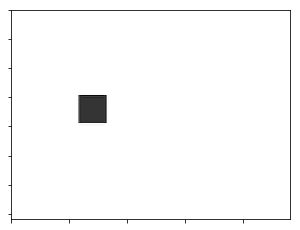

In [68]:
np.savez_compressed("tmp/grayed", imgs = grayed)
grayed_from_file = np.load("tmp/grayed.npz")['imgs']
print("Load img from file: shape = {}".format(grayed_from_file.shape))
plot_img(grayed_from_file)

## Reside All Images, Grayscale, Compress and Save

In [46]:
folder = "data/moving-box/frames/moving-box-uniform/128x128"
imgs = imgs_in_folder(folder, "jpeg")
print("Images in folder: {}".format(len(imgs)))
size = (64, 64)
resized_imgs = [resize(img, size) for img in imgs]
print("resized shape:    {}".format(sample.shape))
grayed_imgs = [rgb2gray(img) for img in resized_imgs]
print("grayed shape:     {}".format(sample_img(grayed_imgs).shape))
processed = np.array(grayed_imgs)
print("Processed:        {}".format(processed.shape))
info = {"images:": "moving box uniform", "dim": processed.shape}

save_path = "data/moving-box/processed/single-uniform-{}".format("x".join(str(x) for x in size))
np.savez_compressed(save_path, imgs = processed, info = info)
print("Saved to:         {}".format(save_path))

Images in folder: 14
resized shape:    (64, 64, 3)
grayed shape:     (64, 64)
Processed:        (14, 64, 64)
Saved to:         data/moving-box/processed/single-uniform-64x64


#### Test

In [52]:
data = np.load(save_path + ".npz")
imgs, info = data['imgs'], data['info']
print("imgs shape:     {}".format(imgs.shape))
print("info:           {}".format(info))

imgs shape:     (14, 64, 64)
info:           {'images:': 'moving box uniform', 'dim': (14, 64, 64)}


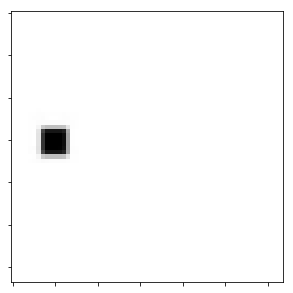

In [66]:
sample = sample_and_show(imgs)